Financial Planning with APIs and Simulations
In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

Part 1: Create a Financial Planner for Emergencies
Evaluate the Cryptocurrency Wallet by Using the Requests Library
In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

Create a variable named monthly_income, and set its value to 12000.

Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

Navigate the JSON response object to access the current price of each coin, and store each in a variable.

Hint Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is 1, and the Ethereum identifier is 1027.

Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

Step 1: Create a variable named monthly_income, and set its value to 12000.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3, sort_keys=True))

{
   "data": {
      "1": {
         "circulating_supply": 18845531,
         "id": 1,
         "last_updated": 1634411051,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 1155596249560,
               "percent_change_1h": 0.853769088779037,
               "percent_change_24h": -0.504315850599819,
               "percent_change_7d": 13.5769930343913,
               "percentage_change_1h": 0.853769088779037,
               "percentage_change_24h": -0.504315850599819,
               "percentage_change_7d": 13.5769930343913,
               "price": 61344.0,
               "volume_24h": 40031972666
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18845531,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1634411051
   }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))

{
   "data": {
      "1027": {
         "circulating_supply": 117953530,
         "id": 1027,
         "last_updated": 1634411063,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 459057655264,
               "percent_change_1h": 0.0893239509366896,
               "percent_change_24h": -0.0251126065079878,
               "percent_change_7d": 9.26424969511255,
               "percentage_change_1h": 0.0893239509366896,
               "percentage_change_24h": -0.0251126065079878,
               "percentage_change_7d": 9.26424969511255,
               "price": 3888.22,
               "volume_24h": 19442802981
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 117953530,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1634411063
   }
}


Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of Bitcoin is ${btc_price: .2f}")

The current price of Bitcoin is $ 61344.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of Ethereum is ${eth_price: .2f}")

The current price of Ethereum is $ 3888.22


Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your Bitcoin holdings is ${btc_value: .2f}")

The current value of your Bitcoin holdings is $ 73612.80


In [11]:
# Compute the current value of the ETH holding
eth_value = eth_coins * eth_price 

# Print current value of your holding in ETH
print(f"The current value of your Ethereum holdings is ${eth_value: .2f}")

The current value of your Ethereum holdings is $ 20607.57


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current total value of your cryptocurrency holdings is ${total_crypto_wallet: .2f}")

The current total value of your cryptocurrency holdings is $ 94220.37


Evaluate the Stock and Bond Holdings by Using the Alpaca SDK
In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

In the Starter_Code folder, create an environment file (.env) to store the values of your Alpaca API key and Alpaca secret key.

Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca tradeapi.REST object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

Set the following parameters for the Alpaca API call:

tickers: Use the tickers for the member’s stock and bond holdings.

timeframe: Use a time frame of one day.

start_date and end_date: Use the same date for these parameters, and format them with the date of the previous weekday (or 2020-08-07). This is because you want the one closing price for the most-recent trading day.

Get the current closing prices for SPY and AGG by using the Alpaca get_barset function. Format the response as a Pandas DataFrame by including the df property at the end of the get_barset function.

Navigating the Alpaca response DataFrame, select the SPY and AGG closing prices, and store them as variables.

Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

Step 1: In the Starter_Code folder, create an environment file (.env) to store the values of your Alpaca API key and Alpaca secret key.

Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca tradeapi.REST object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

print(alpaca)

str

str

Step 3: Set the following parameters for the Alpaca API call:
tickers: Use the tickers for the member’s stock and bond holdings.

timeframe: Use a time frame of one day.

start_date and end_date: Use the same date for these parameters, and format them with the date of the previous weekday (or 2020-08-07). This is because you want the one closing price for the most-recent trading day.

In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-10-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-14", tz="America/New_York").isoformat()


Step 4: Get the current closing prices for SPY and AGG by using the Alpaca get_barset function. Format the response as a Pandas DataFrame by including the df property at the end of the get_barset function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


AGG                                        SPY  \
                            open      high     low   close   volume    open   
time                                                                          
2021-10-14 00:00:00-04:00  114.7  114.8496  114.63  114.84  3540673  439.08   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-14 00:00:00-04:00  442.66  438.58  442.47  59812568

Step 5: Navigating the Alpaca response DataFrame, select the SPY and AGG closing prices, and store them as variables.

In [22]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price of the iShares Core US Aggregate Bond ETF is ${agg_close_price}")

The closing price of the iShares Core US Aggregate Bond ETF is $114.84


In [23]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_closing_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"The closing price of the SPDR S&P 500 Trust ETF is ${spy_closing_price}")

The closing price of the SPDR S&P 500 Trust ETF is $442.47


Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [25]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of iShares Core US Aggregate Bond ETF in your portfolio is ${agg_value: .2f}")

The current value of iShares Core US Aggregate Bond ETF in your portfolio is $ 22968.00


In [26]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_closing_price

# Print the current value of the stock portfolio
print(f"The current value of the SPDR S&P 500 Trust ETF in your portfolio is ${spy_value: .2f}")

The current value of the SPDR S&P 500 Trust ETF in your portfolio is $ 48671.70


In [27]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current value of your Stocks and Bonds Portfolio is ${total_stocks_bonds: .2f}")

The current value of your Stocks and Bonds Portfolio is $ 71639.70


In [28]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current total portfolio balance
print(f"The current total value of your portfolio is ${total_portfolio: .2f}")

The current total value of your portfolio is $ 165860.07


Evaluate the Emergency Fund
In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

Create a Python list named savings_data that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

Use the savings_data list to create a Pandas DataFrame named savings_df, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

savings_data: Use the list that you just created.

columns: Set this parameter equal to a Python list with a single value called amount.

index: Set this parameter equal to a Python list with the values of crypto and stock/bond.

Use the savings_df DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses amount. Be sure to add a title.

Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Create a variable named emergency_fund_value, and set it equal to three times the value of the member’s monthly_income of $12000. (You set this earlier in Part 1).

Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

Step 1: Create a Python list named savings_data that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [31]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data


[94220.36600000001, 71639.70000000001]

Step 2: Use the savings_data list to create a Pandas DataFrame named savings_df, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:
savings_data: Use the list that you just created.

columns: Set this parameter equal to a Python list with a single value called amount.

index: Set this parameter equal to a Python list with the values of crypto and stock/bond.

In [32]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"])

# Display the savings_df DataFrame
print(savings_df)

               amount
crypto      94220.366
stock/bond  71639.700


Step 3: Use the savings_df DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses amount. Be sure to add a title.

<AxesSubplot:title={'center':'Current Portfolio Composition'}, ylabel='amount'>

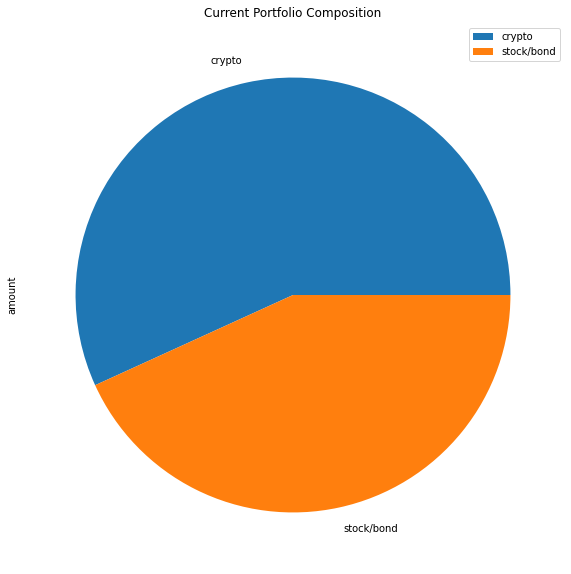

In [33]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount", figsize=(15,10), title="Current Portfolio Composition")